In [4]:
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

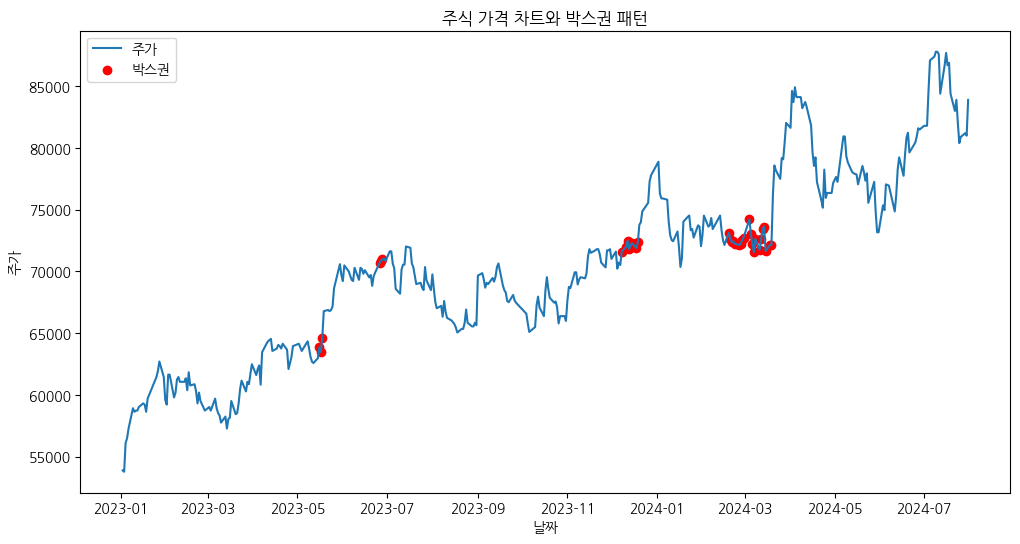

박스권 기간: 35 일
전체 기간 대비 박스권 비율: 9.00%


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    
    boxed_range = df[df['range'] < threshold]
    return boxed_range

def plot_stock_with_boxed_range(df, boxed_range):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(boxed_range.index, boxed_range['Close'], color='red', label='박스권')
    plt.title('주식 가격 차트와 박스권 패턴')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    boxed_range = identify_boxed_range(df)
    plot_stock_with_boxed_range(df, boxed_range)
    
    print(f"박스권 기간: {len(boxed_range)} 일")
    print(f"전체 기간 대비 박스권 비율: {len(boxed_range) / len(df) * 100:.2f}%")

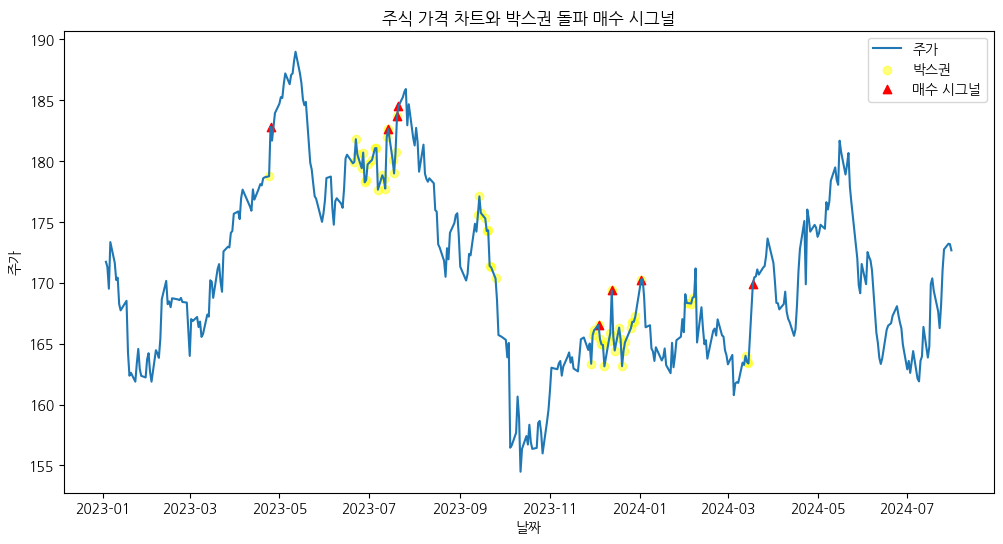

총 수익률: -3.66%
샤프 비율: -1.04
총 매수 시그널 횟수: 8
                                Close  upper_bound
Date                                              
2023-04-25 00:00:00-04:00  182.814545   183.267448
2023-07-14 00:00:00-04:00  182.636017   183.043576
2023-07-20 00:00:00-04:00  183.693756   184.363324
2023-07-21 00:00:00-04:00  184.528275   185.799476
2023-12-04 00:00:00-05:00  166.545807   167.313842
2023-12-13 00:00:00-05:00  169.371780   169.411175
2024-01-02 00:00:00-05:00  170.257980   170.336755
2024-03-18 00:00:00-04:00  169.920166   170.832967


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    
    df['is_boxed'] = df['range'] < threshold
    return df

def find_breakout_signals(df, window=20):
    df['upper_bound'] = df['High'].rolling(window=window).max()
    df['breakout'] = (df['Close'] > df['upper_bound'].shift(1)) & (df['is_boxed'].shift(1))
    return df

def plot_stock_with_signals(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(df[df['is_boxed']].index, df[df['is_boxed']]['Close'], color='yellow', label='박스권', alpha=0.5)
    plt.scatter(df[df['breakout']].index, df[df['breakout']]['Close'], color='red', label='매수 시그널', marker='^')
    plt.title('주식 가격 차트와 박스권 돌파 매수 시그널')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

def backtest_strategy(df):
    df['position'] = df['breakout'].astype(int)
    df['returns'] = df['Close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    
    total_return = (1 + df['strategy_returns']).prod() - 1
    sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
    
    print(f"총 수익률: {total_return:.2%}")
    print(f"샤프 비율: {sharpe_ratio:.2f}")

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "PEP"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_boxed_range(df)
    df = find_breakout_signals(df)
    
    plot_stock_with_signals(df)
    backtest_strategy(df)
    
    print(f"총 매수 시그널 횟수: {df['breakout'].sum()}")
    print(df[df['breakout']][['Close', 'upper_bound']])

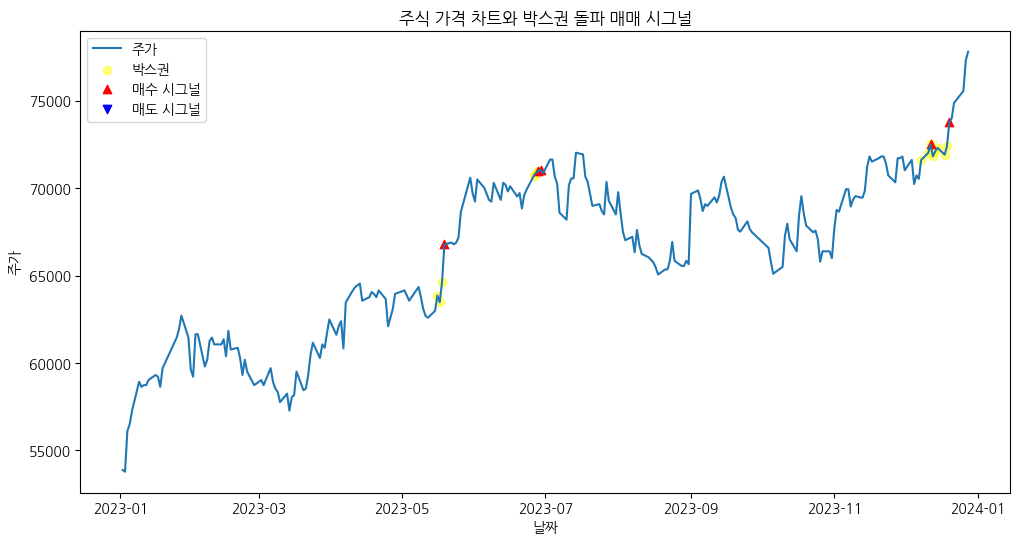

총 수익률: 16.49%
샤프 비율: 1.10
최대 낙폭: -10.00%
총 매수 시그널 횟수: 5
총 매도 시그널 횟수: 0

매수 시그널:
                                  Close   upper_bound
Date                                                 
2023-05-19 00:00:00+09:00  66784.507812  66784.507812
2023-06-28 00:00:00+09:00  70982.953125  70982.953125
2023-06-29 00:00:00+09:00  71042.804688  72024.058896
2023-12-12 00:00:00+09:00  72499.320312  72499.320312
2023-12-20 00:00:00+09:00  73781.625000  73880.263536

매도 시그널:
Empty DataFrame
Columns: [Close, lower_bound]
Index: []


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    
    df['is_boxed'] = df['range'] < threshold
    return df

def find_breakout_signals(df, window=20):
    df['upper_bound'] = df['High'].rolling(window=window).max()
    df['lower_bound'] = df['Low'].rolling(window=window).min()
    df['buy_signal'] = (df['Close'] > df['upper_bound'].shift(1)) & (df['is_boxed'].shift(1))
    df['sell_signal'] = (df['Close'] < df['lower_bound'].shift(1)) & (df['is_boxed'].shift(1))
    return df

def plot_stock_with_signals(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(df[df['is_boxed']].index, df[df['is_boxed']]['Close'], color='yellow', label='박스권', alpha=0.5)
    plt.scatter(df[df['buy_signal']].index, df[df['buy_signal']]['Close'], color='red', label='매수 시그널', marker='^')
    plt.scatter(df[df['sell_signal']].index, df[df['sell_signal']]['Close'], color='blue', label='매도 시그널', marker='v')
    plt.title('주식 가격 차트와 박스권 돌파 매매 시그널')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

def backtest_strategy(df):
    df['position'] = 0
    df.loc[df['buy_signal'], 'position'] = 1
    df.loc[df['sell_signal'], 'position'] = -1
    df['position'] = df['position'].cumsum().clip(lower=0, upper=1)
    
    df['returns'] = df['Close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    
    total_return = (1 + df['strategy_returns']).prod() - 1
    sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
    max_drawdown = (df['strategy_returns'].cumsum() - df['strategy_returns'].cumsum().cummax()).min()
    
    print(f"총 수익률: {total_return:.2%}")
    print(f"샤프 비율: {sharpe_ratio:.2f}")
    print(f"최대 낙폭: {max_drawdown:.2%}")

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_boxed_range(df)
    df = find_breakout_signals(df)
    
    plot_stock_with_signals(df)
    backtest_strategy(df)
    
    print(f"총 매수 시그널 횟수: {df['buy_signal'].sum()}")
    print(f"총 매도 시그널 횟수: {df['sell_signal'].sum()}")
    print("\n매수 시그널:")
    print(df[df['buy_signal']][['Close', 'upper_bound']])
    print("\n매도 시그널:")
    print(df[df['sell_signal']][['Close', 'lower_bound']])

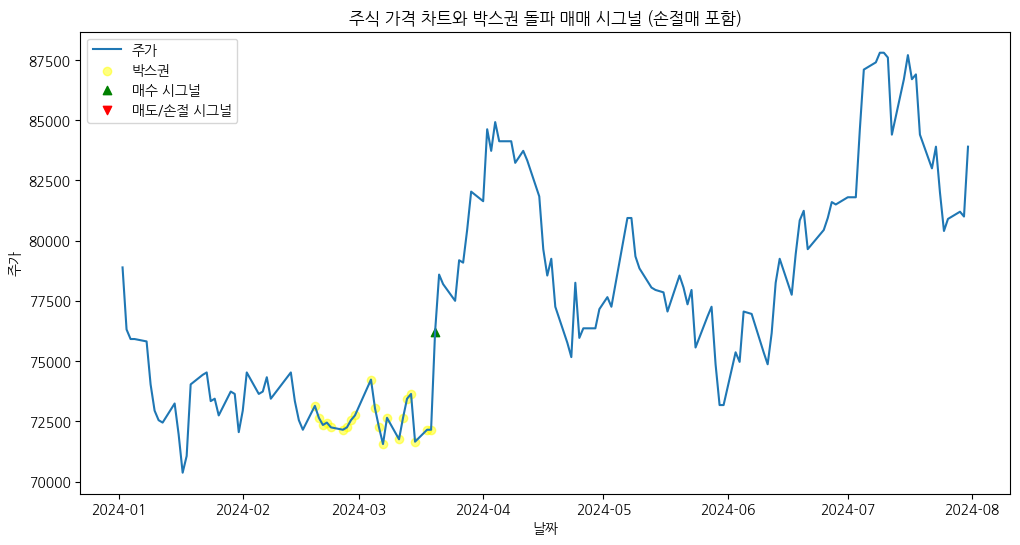

총 수익률: 10.09%
샤프 비율: 0.87
최대 낙폭: -14.31%
총 매수 시그널 횟수: 1
총 매도/손절 시그널 횟수: 0
손절매 발생 횟수: 0


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    df['is_boxed'] = df['range'] < threshold
    return df

def find_breakout_signals(df, window=20):
    df['upper_bound'] = df['High'].rolling(window=window).max()
    df['lower_bound'] = df['Low'].rolling(window=window).min()
    df['buy_signal'] = (df['Close'] > df['upper_bound'].shift(1)) & (df['is_boxed'].shift(1))
    df['sell_signal'] = (df['Close'] < df['lower_bound'].shift(1)) & (df['is_boxed'].shift(1))
    return df

def apply_stop_loss(df, stop_loss_pct=-0.05):
    df['position'] = 0
    df['entry_price'] = np.nan
    current_position = 0
    entry_price = 0

    for i in range(1, len(df)):
        if df.iloc[i]['buy_signal'] and current_position == 0:
            current_position = 1
            entry_price = df.iloc[i]['Close']
        elif df.iloc[i]['sell_signal'] and current_position == 1:
            current_position = 0
        
        # 손절매 조건 확인
        if current_position == 1:
            returns = (df.iloc[i]['Close'] - entry_price) / entry_price
            if returns <= stop_loss_pct:
                current_position = 0
                df.iloc[i, df.columns.get_loc('sell_signal')] = True  # 손절매 시그널 추가
        
        df.iloc[i, df.columns.get_loc('position')] = current_position
        df.iloc[i, df.columns.get_loc('entry_price')] = entry_price

    return df

def plot_stock_with_signals(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(df[df['is_boxed']].index, df[df['is_boxed']]['Close'], color='yellow', label='박스권', alpha=0.5)
    plt.scatter(df[df['buy_signal']].index, df[df['buy_signal']]['Close'], color='green', label='매수 시그널', marker='^')
    plt.scatter(df[df['sell_signal']].index, df[df['sell_signal']]['Close'], color='red', label='매도/손절 시그널', marker='v')
    plt.title('주식 가격 차트와 박스권 돌파 매매 시그널 (손절매 포함)')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

def backtest_strategy(df):
    df['returns'] = df['Close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    
    total_return = (1 + df['strategy_returns']).prod() - 1
    sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
    max_drawdown = (df['strategy_returns'].cumsum() - df['strategy_returns'].cumsum().cummax()).min()
    
    print(f"총 수익률: {total_return:.2%}")
    print(f"샤프 비율: {sharpe_ratio:.2f}")
    print(f"최대 낙폭: {max_drawdown:.2%}")

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2024-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_boxed_range(df)
    df = find_breakout_signals(df)
    df = apply_stop_loss(df, stop_loss_pct=-0.05)
    
    plot_stock_with_signals(df)
    backtest_strategy(df)
    
    print(f"총 매수 시그널 횟수: {df['buy_signal'].sum()}")
    print(f"총 매도/손절 시그널 횟수: {df['sell_signal'].sum()}")
    
    # 손절매 발생 횟수 계산
    stop_loss_count = ((df['sell_signal'] & (df['Close'] < df['entry_price'])) & 
                       ((df['Close'] - df['entry_price']) / df['entry_price'] <= -0.05)).sum()
    print(f"손절매 발생 횟수: {stop_loss_count}")

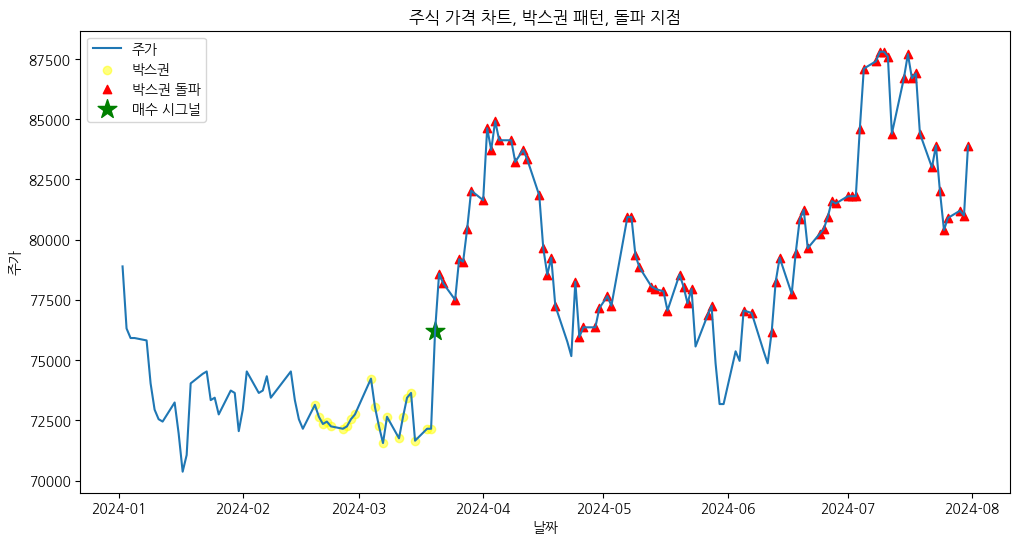

매수 시그널 발생 날짜: 2024-03-20
매수 시그널 발생 가격: 76212.20


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    """
    야후 파이낸스에서 주식 데이터를 가져오는 함수
    :param ticker: 주식 티커 심볼
    :param start_date: 시작 날짜
    :param end_date: 종료 날짜
    :return: 주식 데이터 DataFrame
    """
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    """
    박스권을 식별하는 함수
    :param df: 주식 데이터 DataFrame
    :param window: 롤링 윈도우 크기
    :param threshold: 박스권 판단 임계값
    :return: 박스권이 식별된 DataFrame
    """
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    boxed_range = df[df['range'] < threshold].copy()
    return boxed_range

def identify_breakout(df, boxed_range, breakout_threshold=0.02):
    """
    박스권 돌파를 식별하는 함수
    :param df: 전체 주식 데이터 DataFrame
    :param boxed_range: 박스권이 식별된 DataFrame
    :param breakout_threshold: 돌파 판단 임계값
    :return: 돌파 시점이 표시된 DataFrame
    """
    if not boxed_range.empty:
        last_boxed_date = boxed_range.index[-1]
        last_boxed_high = boxed_range['High'].max()
        
        df['breakout'] = False
        df.loc[(df.index > last_boxed_date) & (df['Close'] > last_boxed_high * (1 + breakout_threshold)), 'breakout'] = True
        
        first_breakout = df[df['breakout']].first_valid_index()
        if first_breakout:
            df.loc[first_breakout, 'buy_signal'] = True
    
    return df

def plot_stock_with_analysis(df, boxed_range):
    """
    주식 차트, 박스권, 돌파 지점을 시각화하는 함수
    :param df: 분석된 주식 데이터 DataFrame
    :param boxed_range: 박스권이 식별된 DataFrame
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(boxed_range.index, boxed_range['Close'], color='yellow', label='박스권', alpha=0.5)
    
    breakout_points = df[df['breakout']]
    plt.scatter(breakout_points.index, breakout_points['Close'], color='red', label='박스권 돌파', marker='^')
    
    buy_signal = df[df['buy_signal'] == True]
    if not buy_signal.empty:
        plt.scatter(buy_signal.index, buy_signal['Close'], color='green', s=200, label='매수 시그널', marker='*')
    
    plt.title('주식 가격 차트, 박스권 패턴, 돌파 지점')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2024-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    boxed_range = identify_boxed_range(df)
    df = identify_breakout(df, boxed_range)
    plot_stock_with_analysis(df, boxed_range)
    
    buy_signal = df[df['buy_signal'] == True]
    if not buy_signal.empty:
        print(f"매수 시그널 발생 날짜: {buy_signal.index[0].date()}")
        print(f"매수 시그널 발생 가격: {buy_signal['Close'].values[0]:.2f}")
    else:
        print("해당 기간 동안 매수 시그널이 발생하지 않았습니다.")